# Week 3 handin - by Benjamin S (cph-bs190)

## Assignment

### Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
7. Read student data into a list of Students from a csv file: 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis
8. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
9. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

### Ex 2 Exceptions (extra)
1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

### Ex 3 Plotting (extra)
1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)


## Status

I have completed all exercises, including the extra ones.

# Exercise 1 - Classes
### 1 - 6 can be found in modules/w3_classes.py

### 7 - 7.1

In [61]:
from modules.w3_classes import Course, Student, DataSheet, grades
import random, csv, string


names = ["Joe", "Hanna", "Tim", "Martin", "Else", "Jasmin", "Anna"]
last_name_initials = list(string.ascii_uppercase)
genders = ["Male", "Female"]
courses = []
courses.append(Course("Computer Science", "1B", "John Hansen", 60))
courses.append(Course("Biology", "5F", "Maja Kofod", 30))
courses.append(Course("Psychology", "3A", "Ernst Gugenheim", 60))
courses.append(Course("Philosophy", "9C", "Morten Ågård", 30))
courses.append(Course("Communication", "3D", "Sofie Andreasen", 30))
img_urls = ["student1.jpg", "student2.jpg", "student3.jpg", "student4.jpg", "student5.jpg", "student6.jpg", "student7.jpg"]

def generate_n_students(n):
    students = []
    while (n > 0):
        n -= 1
        rnd_numbers = range(1, 5)
        n_of_courses = random.choice(rnd_numbers)
        data_sheet = DataSheet(random.sample(courses, n_of_courses))
        for course in data_sheet.courses:
            course.grade = random.choice(grades)
            
        students.append(Student(random.choice(names) + " " + random.choice(last_name_initials), random.choice(genders), data_sheet, random.choice(img_urls)))

    with open("testfiles/students.csv", "w") as csv_file:
        fieldnames = ["stud_name", "gender", "course_name", "teacher", "ects", "classroom", "grade", "img_url"]
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        writer.writeheader()
        for student in students:
            for course in student.data_sheet.courses:
                writer.writerow({fieldnames[0]: student.name, fieldnames[1]: student.gender, fieldnames[2]: course.name, fieldnames[3]: course.teacher, 
                fieldnames[4]: course.ECTS, fieldnames[5]: course.classroom, fieldnames[6]: course.grade, fieldnames[7]: student.image_url})

    return students

students = generate_n_students(12)
for student in students:
    print(student.name, ": ", student.gender)
    print("Number of courses: ", len(student.data_sheet.courses))

Jasmin X :  Male
Number of courses:  1
Else F :  Male
Number of courses:  4
Anna Q :  Female
Number of courses:  3
Jasmin L :  Male
Number of courses:  1
Martin D :  Male
Number of courses:  3
Joe V :  Male
Number of courses:  4
Hanna C :  Female
Number of courses:  2
Hanna T :  Female
Number of courses:  4
Hanna W :  Female
Number of courses:  2
Anna S :  Male
Number of courses:  2
Anna L :  Female
Number of courses:  3
Joe I :  Female
Number of courses:  3


### 8 - 8.3

Name:  Jasmin X 
Image URL:  student1.jpg 
Average grade:  10 

Name:  Else F 
Image URL:  student5.jpg 
Average grade:  7 

Name:  Anna Q 
Image URL:  student1.jpg 
Average grade:  4 

Name:  Jasmin L 
Image URL:  student4.jpg 
Average grade:  12 

Name:  Martin D 
Image URL:  student2.jpg 
Average grade:  7 

Name:  Joe V 
Image URL:  student1.jpg 
Average grade:  7 

Name:  Hanna C 
Image URL:  student2.jpg 
Average grade:  2 

Name:  Hanna T 
Image URL:  student3.jpg 
Average grade:  7 

Name:  Hanna W 
Image URL:  student2.jpg 
Average grade:  7 

Name:  Anna S 
Image URL:  student3.jpg 
Average grade:  7 

Name:  Anna L 
Image URL:  student4.jpg 
Average grade:  7 

Name:  Joe I 
Image URL:  student7.jpg 
Average grade:  10 


Students sorted by average grade (ascending)

Name:  Hanna C 
Average grade:  2 

Name:  Anna Q 
Average grade:  4 

Name:  Else F 
Average grade:  7 

Name:  Martin D 
Average grade:  7 

Name:  Joe V 
Average grade:  7 

Name:  Hanna T 
Average grade:  7 

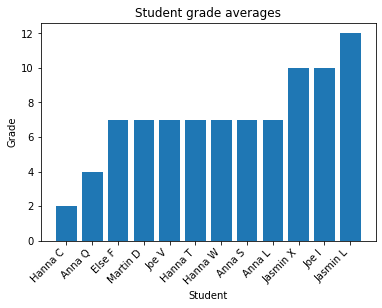

In [62]:
from modules.w3_classes import Course, Student, DataSheet, grades, read_students_from_csv 
import csv, matplotlib.pyplot as plt

# I moved this function into w3_classes.py since I use it in multiple cells.
# 8.1 - reading students from csv file to list and printing data from them

students = read_students_from_csv("testfiles/students.csv")
for student in students:
    print("Name: ", student.name, 
    "\nImage URL: ", student.image_url, 
    "\nAverage grade: ", student.get_avg_grade(),"\n")

# 8.2 - sorting list by average grade

def get_grade(student):
    return student.get_avg_grade()

students.sort(key=get_grade)
print("\nStudents sorted by average grade (ascending)\n")

for student in students:
    print("Name: ", student.name, 
    "\nAverage grade: ", student.get_avg_grade(),"\n")

# 8.3 - bar chart of average grades for students

stud_names = []
avg_grades = []
for student in students:
    stud_names.append(student.name)
    avg_grades.append(student.get_avg_grade())

plt.bar(stud_names, avg_grades)
plt.title("Student grade averages")
plt.xlabel("Student")
plt.ylabel("Grade")
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

plt.show()


### 9 - 10

Name: Jasmin X 20.0 %
Name: Else F 100.0 %
Name: Anna Q 100.0 %
Name: Jasmin L 20.0 %
Name: Martin D 80.0 %
Name: Joe V 100.0 %
Name: Hanna C 60.0 %
Name: Hanna T 100.0 %
Name: Hanna W 40.0 %
Name: Anna S 60.0 %
Name: Anna L 60.0 %
Name: Joe I 80.0 %


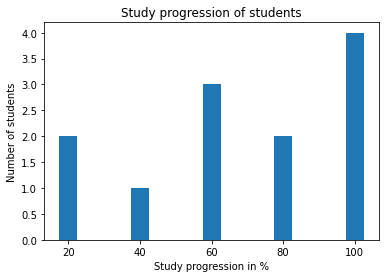


Simple test without iterator:
 Philosophy

Using iterator on DataSheet:
1. Philosophy
2. Psychology


In [63]:
from modules.w3_classes import read_students_from_csv, DataSheet
import matplotlib.pyplot as plt

# 9 - Study progression percentage

students = read_students_from_csv("testfiles/students.csv")
for student in students:
    print("Name:", student.name, student.get_study_progression(), "%")

# 10 - Bar chart of study progression and number of students in each category

percentages = []
n_of_students_in_cat = []

for student in students:
    if student.get_study_progression() not in percentages:
        percentages.append(student.get_study_progression())

percentages.sort()

for perc in percentages:
    count = 0
    for student in students:
        if perc == student.get_study_progression():
            count += 1
            
    n_of_students_in_cat.append(count)

plt.bar(percentages, n_of_students_in_cat, width=5)
plt.title("Study progression of students")
plt.xlabel("Study progression in %")
plt.ylabel("Number of students")

plt.show()

# Extra: Iterable DataSheet class - check w3_classes.py in modules to see the class 

test = students[1].data_sheet
test_iter = test.__iter__()
print("\nSimple test without iterator:\n", test.courses[0].name)
print("\nUsing iterator on DataSheet:\n1.", test_iter.__next__().name)

## Will result in a StopIteration exception if there is only 1 course on the data sheet.
print("2.", test_iter.__next__().name) 


# Exercise 2

### 1 - 3

In [64]:
from modules.w3_classes import read_students_from_csv 
import heapq, csv

students = read_students_from_csv("testfiles/students.csv")

# 1 - Function that takes list of students and returns 3 closest to study completion

def get_highest_prog_students(stud_list):
    percentages = []
    highest_prog_students = []

    if len(stud_list) < 3:
        raise NotEnoughStudentsException("List must contain at least 3 students.")

    for student in stud_list:
        if student.get_study_progression() != 100.0: # I want the students closest to completion, not ones that are done
             percentages.append(student.get_study_progression())

    highest_pcts = heapq.nlargest(3, percentages)
    for pct in highest_pcts:
        for student in stud_list:
            if student.get_study_progression() == pct and student not in highest_prog_students:
                if len(highest_prog_students) == 3:
                    break
                else:
                    highest_prog_students.append(student)
    return highest_prog_students

# 2 - Raise custom exception if student list length is less than 3

class NotEnoughStudentsException(Exception):
    pass

## Comment the three lines below out to test error being written to csv file.
highest_prog_studs = get_highest_prog_students(students)
for student in highest_prog_studs:
    print("Name:", student.name, " - Progression:", student.get_study_progression(), "%")

# 3 + 3.1 - Function that writes list of highest prog students to csv file, or exception if raised

def write_highest_prog_studs_to_csv(csv_file, stud_list):
    with open(csv_file, "w") as f_obj:
        try: 
            studs_for_file = get_highest_prog_students(stud_list)
            fieldnames = ["stud_name", "gender", "img_url", "completion_percentage"]
            writer = csv.DictWriter(f_obj, fieldnames=fieldnames)
            writer.writeheader()

            for student in studs_for_file:
                writer.writerow({fieldnames[0]: student.name, fieldnames[1]: student.gender,  fieldnames[2]: student.image_url,
                fieldnames[3]: student.get_study_progression()})
        except:
            f_obj.write("Error: list must contain at least 3 students")


write_highest_prog_studs_to_csv("testfiles/highest_prog_studs.csv", students)



Name: Martin D  - Progression: 80.0 %
Name: Joe I  - Progression: 80.0 %
Name: Hanna C  - Progression: 60.0 %


# Exercise 3

### 1

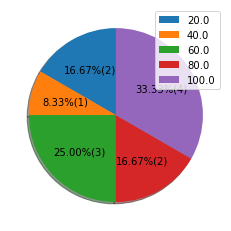

In [65]:
from modules.w3_classes import read_students_from_csv 
import matplotlib.pyplot as plt

students = read_students_from_csv("testfiles/students.csv")

def create_stud_pie_chart(stud_list):
    percentages = []
    n_of_students_in_cat = []

    for student in stud_list:
        if student.get_study_progression() not in percentages:
            percentages.append(student.get_study_progression())

    percentages.sort()

    for pct in percentages:
        count = 0
        for student in stud_list:
            if pct == student.get_study_progression():
                count += 1
                
        n_of_students_in_cat.append(count)
        
    explode = (0.1, 0, 0, 0) 
    fig, ax = plt.subplots() 
    ax.pie(n_of_students_in_cat, autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(n_of_students_in_cat)), 
        shadow=True, startangle=90)
    ax.set_aspect('equal')
    ax.legend(percentages, loc='upper right') 
    plt.show()
    
create_stud_pie_chart(students)

### 2 - 3

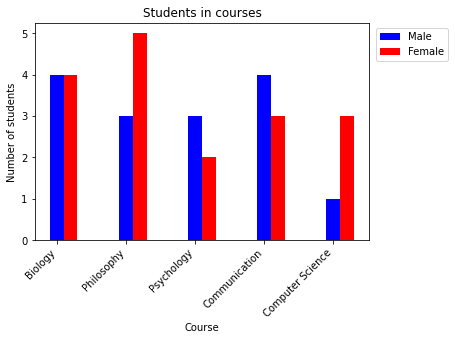

In [1]:
from modules.w3_classes import read_students_from_csv 
import matplotlib.pyplot as plt

students = read_students_from_csv("testfiles/students.csv")

def get_popularity_of_courses(stud_list):
    course_names = []
    n_of_male_students_in_courses = []
    n_of_female_students_in_courses = []

    for student in stud_list:
        for course in student.data_sheet.courses:
            if course.name not in course_names:
                course_names.append(course.name)
    
    for name in course_names:
        m_count = 0
        f_count = 0
        for student in stud_list:
            for course in student.get_courses():
                if course.name == name:
                    if student.gender == "Male":
                        m_count += 1
                    else:
                        f_count += 1
        
        n_of_male_students_in_courses.append(m_count)
        n_of_female_students_in_courses.append(f_count)
    

    fig = plt.figure()
    ax = fig.add_subplot()
    width = 0.2
    x_range = range(1,len(course_names)+1)
    m_x_vals = list(x_range)
    f_x_vals = [x+width for x in m_x_vals]
    m_rects = ax.bar(m_x_vals, n_of_male_students_in_courses, width, color="blue")
    f_rects = ax.bar(f_x_vals, n_of_female_students_in_courses, width, color="red")
    plt.title("Students in courses")
    plt.xlabel("Course")
    plt.ylabel("Number of students")
    plt.xticks(m_x_vals, course_names, rotation=45, horizontalalignment='right',fontweight='light')
    plt.legend((m_rects[0], f_rects[0]), ("Male", "Female"), loc="upper right", bbox_to_anchor=(1.25, 1))

    plt.show()


get_popularity_of_courses(students)

